In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import namedtuple
%matplotlib inline

import utils

plt.rcParams['figure.figsize'] = [20, 12]

In [2]:
ONE_DAY = pd.Timedelta("1D")
Args = namedtuple("Args", "rolling_mean est_window smooth model_cov_weight")

In [3]:
age_data = pd.read_csv("data/uk_nation_cases_deaths_by_age.csv",parse_dates=["date"])
age_data = age_data[age_data.areaName=="England"]
age_data["metric"] = age_data["metric"].map({"newCasesBySpecimenDateAgeDemographics":"cases","newDeaths28DaysByDeathDateAgeDemographics":"deaths"})
age_data = age_data.pivot(index="date", columns=["metric","age"], values="cases")
# age_data = age_data[age_data.index>"2020-06-01"]
age_data.iloc[-5:]

metric      cases                                                       \
age         00_04  05_09  10_14  15_19   20_24   25_29   30_34   35_39   
date                                                                     
2021-02-12  329.0  304.0  320.0  521.0   848.0  1009.0  1077.0   996.0   
2021-02-13  254.0  223.0  248.0  394.0   617.0   684.0   838.0   756.0   
2021-02-14  255.0  229.0  232.0  315.0   613.0   690.0   826.0   766.0   
2021-02-15  349.0  303.0  314.0  565.0  1030.0  1149.0  1242.0  1191.0   
2021-02-16  331.0  278.0  278.0  438.0   917.0  1078.0  1119.0  1098.0   

metric                     ... deaths                                          \
age          40_44  45_49  ...  05_09 60_64 65_69 70_74 75_79 80_84 85_89 90+   
date                       ...                                                  
2021-02-12   875.0  777.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN   
2021-02-13   642.0  599.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN   
2021-02-14   620.0  606.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN   
2021-02-15  1026.0  998.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN   
2021-02-16   877.0  854.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN   

metric                
age        60+ 00_59  
date                  
2021-02-12 NaN   NaN  
2021-02-13 NaN   NaN  
2021-02-14 NaN   NaN  
2021-02-15 NaN   NaN  
2021-02-16 NaN   NaN  

[5 rows x 43 columns]

In [4]:
cols = ["00_59","60+"]
# cols = ["00_04","05_09","10_14","15_19","20_24","25_29","30_34","35_39","40_44","45_49","50_54","55_59","60_64","65_69","70_74","75_79","80_84","85_89","90+"]
# cols = ["50_54","55_59","60_64","65_69","70_74","75_79","80_84","85_89","90+"]
# cols = ["70_74","75_79","80_84","85_89","90+"]
cases = age_data.loc[:,("cases",cols)]
deaths = age_data.loc[:,("deaths",cols)]
case_prop = cases.div(cases.sum(axis=1),axis=0)
case_prop.columns = cols
deaths_prop = deaths.div(deaths.sum(axis=1),axis=0)
deaths_prop.columns = cols

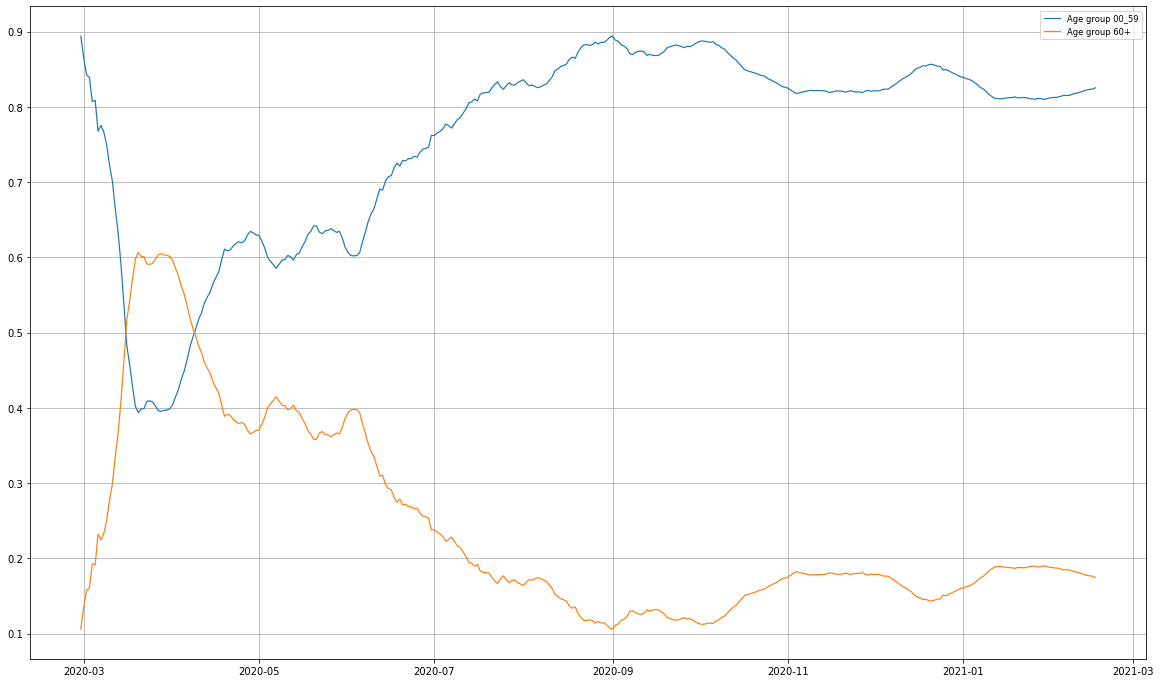

In [5]:
for c in cols:
    plt.plot(case_prop[c].rolling(7).mean(),label=f"Age group {c}")
#plt.yscale("log")
plt.grid(axis="x")
plt.grid(axis="y",which="both")
plt.legend()
plt.show()